In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#melihat semua row dan column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#import standarscaller
from sklearn.preprocessing import StandardScaler, LabelEncoder

#import libraries untuk classification project
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#libraries for evaluation classification project
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay

In [5]:
df = pd.read_csv('AIDS.csv')
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,707,0,1,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1399,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1352,0,1,1,3,0,0,0,504,353,870,782,0


In [6]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,379.175783,0.288453,0.827957,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,468.657526,0.453149,0.377506,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,142.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,739.500000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,2851.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [7]:
df.shape

(2139, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [9]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= time =================


time
1087    34
1088    24
1154    18
1091    16
1090    16
1089    16
993     15
1132    14
1097    13
1117    13
1139    12
1140    12
1014    12
1064    11
990     11
1098    11
1119    11
986     11
1133    11
1104    11
1138    11
896     11
1068    10
1096    10
1123    10
987     10
1012    10
1147    10
1160    10
1110    10
1145    10
1101     9
1116     9
977      9
1032     9
1081     9
1124     9
980      9
1152     9
1146     9
1077     9
948      9
1066     9
1042     9
1153     8
476      8
1069     8
1062     8
1112     8
991      8
1034     8
1095     8
999      8
1063     8
392      8
1126     8
1002     8
1167     8
959      8
1157     8
975      7
1049     7
561      7
984      7
963      7
1021     7
1054     7
1121     7
1065     7
981      7
1151     7
477      7
1041     7
1131     7
1094     7
1103     7
1059     6
994      6
1000     6
1102     6
308      6
974      6
1084     6
1071     6
1105     6
1109     6
989      6
310      6
1020     6
1010     6
947  


============= trt =================


trt
3    561
0    532
2    524
1    522
Name: count, dtype: int64


============= age =================


age
33    111
32    109
30    109
29    106
31    105
37    100
27     98
35     98
36     94
39     91
28     90
34     90
38     86
40     72
41     63
26     60
42     58
45     55
43     52
25     51
44     42
24     33
48     33
47     32
46     28
49     26
23     26
22     22
50     20
21     19
20     17
51     11
52     11
54     11
59      8
55      8
53      8
16      7
19      7
57      7
18      7
14      6
63      6
58      5
62      5
56      5
17      4
13      3
12      3
15      3
60      3
65      3
67      2
70      2
64      2
61      2
68      2
66      1
69      1
Name: count, dtype: int64


============= wtkg =================


wtkg
70.76160     26
77.11200     24
78.01920     23
73.02960     22
76.20480     20
72.57600     20
69.85440     19
69.40080     18
86.18400     17
68.04000     17
74.39040     17
78.47280     16
64.41120     16
66.67920     16
68.49360     16
78.92640     16
67.13280     15
79.38000     15
65.31840     14
74.84400     14
83.46240     14
81.64800     13
82.10160     13
80.74080     13
70.30800     13
66.22560     13
85.73040     13
67.58640     13
84.36960     12
73.93680     12
68.94720     12
79.83360     12
86.63760     12
82.55520     12
75.29760     12
62.59680     12
71.66880     11
63.05040     11
75.75120     11
71.21520     11
73.48320     11
65.77200     11
76.65840     11
85.27680     11
84.82320     10
72.12240     10
81.19440     10
63.50400     10
59.87520      9
80.28720      9
72.50000      9
83.91600      9
70.50000      9
89.35920      9
83.00880      9
57.60720      9
69.00000      9
57.15360      8
65.50000      8
58.06080      8
75.00000      8
70.00000      8
64.


============= hemo =================


hemo
0    1959
1     180
Name: count, dtype: int64


============= homo =================


homo
1    1414
0     725
Name: count, dtype: int64


============= drugs =================


drugs
0    1858
1     281
Name: count, dtype: int64


============= karnof =================


karnof
100    1263
90      787
80       80
70        9
Name: count, dtype: int64


============= oprior =================


oprior
0    2092
1      47
Name: count, dtype: int64


============= z30 =================


z30
1    1177
0     962
Name: count, dtype: int64


============= preanti =================


preanti
0       873
768       6
917       6
7         5
175       5
213       5
238       5
925       5
807       4
959       4
406       4
902       4
181       4
90        4
245       4
872       4
105       4
918       4
842       4
585       4
113       4
68        4
629       4
816       4
953       4
931       4
930       4
493       4
832       4
31        4
6         4
852       4
909       3
76        3
432       3
85        3
139       3
957       3
91        3
106       3
739       3
949       3
389       3
540       3
537       3
448       3
383       3
325       3
41        3
112       3
56        3
933       3
980       3
676       3
811       3
1423      3
588       3
20        3
335       3
626       3
888       3
75        3
817       3
411       3
843       3
230       3
161       3
327       3
517       3
380       3
94        3
945       3
940       3
329       3
420       3
103       3
289       3
233       3
160       3
735       3
969       3
822       3
273     


============= race =================


race
0    1522
1     617
Name: count, dtype: int64


============= gender =================


gender
1    1771
0     368
Name: count, dtype: int64


============= str2 =================


str2
1    1253
0     886
Name: count, dtype: int64


============= strat =================


strat
1    886
3    843
2    410
Name: count, dtype: int64


============= symptom =================


symptom
0    1769
1     370
Name: count, dtype: int64


============= treat =================


treat
1    1607
0     532
Name: count, dtype: int64


============= offtrt =================


offtrt
0    1363
1     776
Name: count, dtype: int64


============= cd40 =================


cd40
300     27
280     24
420     23
410     19
380     19
320     19
400     18
230     18
350     17
440     16
270     16
390     16
290     15
310     15
360     14
340     14
250     14
260     14
220     13
293     13
470     12
480     12
370     12
319     12
210     11
240     11
450     11
490     11
378     11
375     11
374     10
316     10
321     10
276     10
232     10
324     10
265     10
336     10
275     10
296     10
330     10
421     10
441      9
468      9
481      9
248      9
200      9
359      9
297      9
342      9
225      9
257      9
348      9
416      9
236      9
384      9
429      8
337      8
308      8
352      8
234      8
358      8
255      8
246      8
460      8
434      8
269      8
385      8
422      8
238      8
252      8
198      8
364      8
251      8
209      8
373      7
356      7
323      7
368      7
386      7
266      7
353      7
312      7
277      7
395      7
286      7
267      7
477      7
239      7
259      7
448  


============= cd420 =================


cd420
300     22
270     17
390     17
380     16
400     15
310     15
290     15
250     15
360     14
320     14
450     13
336     13
330     13
590     13
510     12
280     12
312     12
410     12
210     12
420     12
440     12
285     12
240     11
350     11
200     11
378     11
426     11
340     11
251     11
464     10
323     10
470     10
480     10
403     10
353      9
325      9
294      9
500      9
372      9
220      9
328      9
272      9
357      9
343      9
475      9
277      8
341      8
264      8
275      8
428      8
265      8
490      8
246      8
230      8
342      8
430      8
260      8
238      8
345      7
364      7
334      7
559      7
248      7
348      7
221      7
293      7
267      7
433      7
315      7
370      7
252      7
237      7
332      7
314      7
339      7
306      7
292      7
376      7
208      7
418      7
406      7
460      7
570      7
276      7
459      7
179      7
286      6
352      6
204      6
309      6
338 


============= cd80 =================


cd80
620     10
870     10
1040    10
880      9
990      9
950      9
1000     9
680      8
850      8
520      8
570      8
770      8
690      7
1070     7
610      7
730      6
796      6
840      6
780      6
590      6
600      6
1020     6
828      6
890      6
699      6
572      6
649      6
700      6
960      6
550      6
800      6
910      6
720      6
1180     6
858      6
804      5
540      5
696      5
519      5
594      5
640      5
1080     5
864      5
930      5
546      5
636      5
716      5
998      5
894      5
1510     5
847      5
745      5
980      5
1111     5
689      5
612      5
1190     5
941      5
618      5
480      5
740      5
744      5
816      5
691      5
936      5
735      5
830      5
860      5
500      5
660      5
820      5
786      4
1550     4
1426     4
927      4
577      4
606      4
624      4
710      4
515      4
622      4
988      4
675      4
875      4
739      4
899      4
623      4
1140     4
370      4
601      4
920  


============= cd820 =================


cd820
920     11
730     11
570     10
710     10
740      9
700      9
530      9
590      9
630      8
560      8
756      8
1180     8
620      8
690      8
720      8
1020     8
713      8
550      7
1010     7
480      7
490      7
882      7
960      7
549      7
485      6
1254     6
660      6
860      6
980      6
500      6
656      6
1140     6
950      6
840      6
760      6
940      6
830      6
990      6
1160     6
1090     6
738      6
910      6
600      6
890      6
790      5
930      5
450      5
680      5
601      5
1250     5
1220     5
874      5
1070     5
510      5
816      5
583      5
1230     5
1030     5
460      5
847      5
440      5
941      5
900      5
873      5
1280     5
564      5
770      5
728      5
605      5
703      5
1290     5
678      5
1073     5
1150     5
784      5
1008     5
380      4
893      4
1129     4
967      4
996      4
642      4
659      4
1300     4
653      4
789      4
686      4
1149     4
649      4
586      4
870 


============= infected =================


infected
0    1618
1     521
Name: count, dtype: int64

In [10]:
print("Before drop duplicated data")
df.shape

Before drop duplicated data


(2139, 23)

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
print("After drop duplicated data")
df.shape

After drop duplicated data


(2139, 23)

In [13]:
df.isna().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

D:\APLIKASI\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

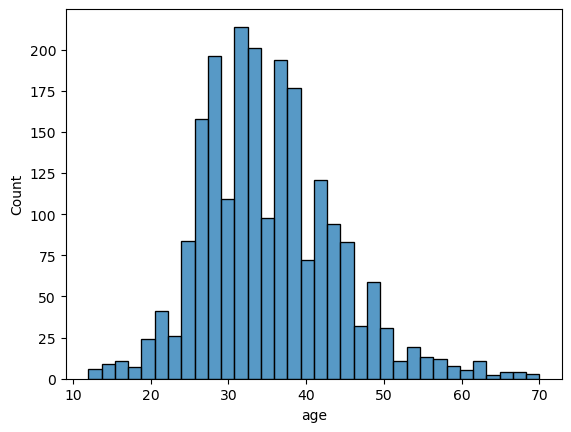

In [14]:
sns.histplot(df['age'])

<Axes: >

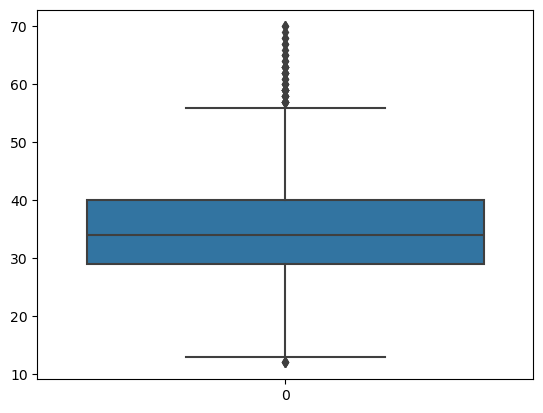

In [15]:
# Check outliers using boxplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['age'])

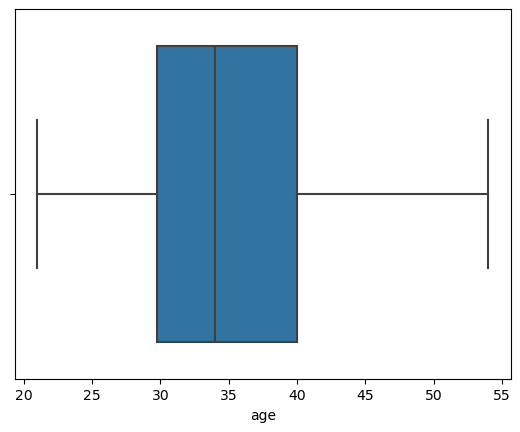

In [16]:
# Filter data
x = df["age"][(df["age"] < 55) & (df["age"] > 20)]

# Plot boxplot
sns.boxplot(x=x)
plt.xlabel(x.name)

# Show plot
plt.show()

In [17]:
df['infected'].value_counts()

infected
0    1618
1     521
Name: count, dtype: int64

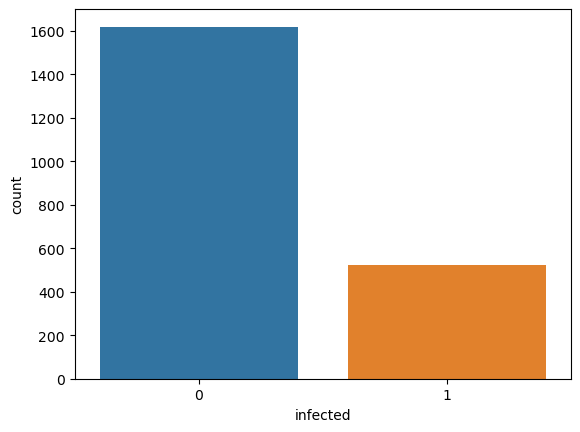

In [18]:
sns.countplot(x="infected",data=df);

In [19]:
# Assign 'TARGET' column to y 
y = df['infected'].values
# Assign all columns except 'TARGET' to X
X = df.drop(['infected'], axis = 1).values

In [20]:
from imblearn import under_sampling, over_sampling

#X = df_numeric.drop(['survived'],axis=1)
#y = df_numeric['survived']

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)

# Overampling
#X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)

# Overampling with smote
#X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

In [21]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2,random_state =42)
print("X_train dataset: ", x_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", x_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (833, 22)
y_train dataset:  (833,)
X_test dataset:  (209, 22)
y_test dataset:  (209,)


In [22]:
# %%KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train) #MACHINE LEARNING SEDANG DALAM PROSES BELAJAR
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.8229665071770335


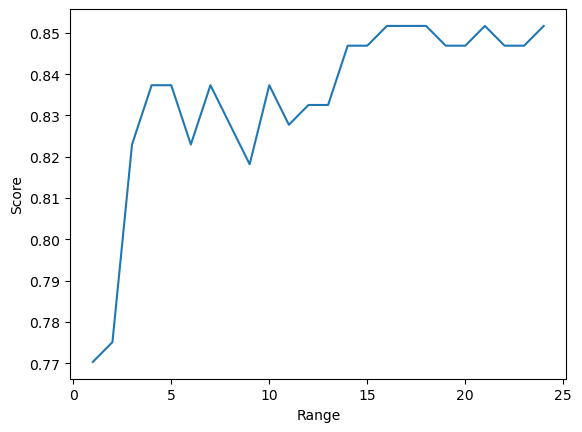

In [23]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [24]:
knn_model = KNeighborsClassifier(n_neighbors = 7) #set K neighbor
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy according to K=7 is :",accuracy_knn)

KNN accuracy according to K=7 is : 0.8373205741626795


In [26]:
# %%Logistic regression classification
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8851674641148325


D:\APLIKASI\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.8229665071770335


In [30]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.8660287081339713


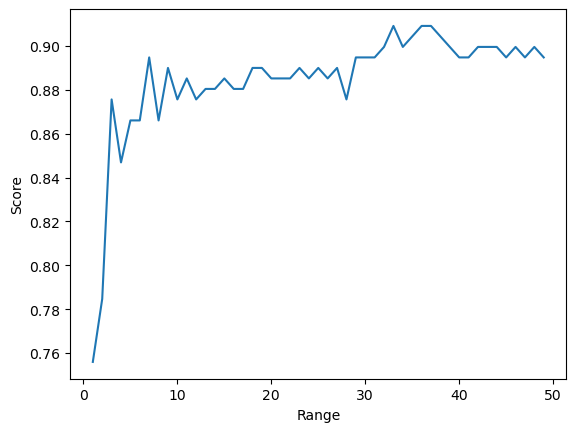

In [31]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [32]:
rf_model = RandomForestClassifier(n_estimators = 7, random_state = 1) #set tree number
rf_model.fit(x_train,y_train)
accuracy_rf = rf_model.score(x_test,y_test)
print("Random Forest accuracy for 7 trees is :",accuracy_rf)

Random Forest accuracy for 7 trees is : 0.8947368421052632


In [34]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
accuracy_nb = nb_model.score(x_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.8086124401913876


In [36]:
def model_evaluation(model,name):
    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

In [37]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [38]:
print_scores("========Logistic Regression=========;",y_test, lr_model.predict(x_test))
print('========================')
print_scores("=========Naive Bayes=========;",y_test, nb_model.predict(x_test))
print('========================')
print_scores("=========Decision Tree=========;",y_test, dt_model.predict(x_test))
print('========================')
print_scores("=========Random Forest=========;",y_test, rf_model.predict(x_test))
print_scores("=========KNN=========;",y_test, knn.predict(x_test))
print('========================')

========Logistic Regression=========;
accuracy:  0.8851674641148325
precision:  0.8854166666666666
recall:  0.8673469387755102
f1_score:  0.885088189076252
=========Naive Bayes=========;
accuracy:  0.8086124401913876
precision:  0.8020833333333334
recall:  0.7857142857142857
f1_score:  0.8084803151270867
=========Decision Tree=========;
accuracy:  0.8229665071770335
precision:  0.8080808080808081
recall:  0.8163265306122449
f1_score:  0.8230153024985732
=========Random Forest=========;
accuracy:  0.8947368421052632
precision:  0.8725490196078431
recall:  0.9081632653061225
f1_score:  0.8948237566393047
=========KNN=========;
accuracy:  0.8229665071770335
precision:  0.8080808080808081
recall:  0.8163265306122449
f1_score:  0.8230153024985732


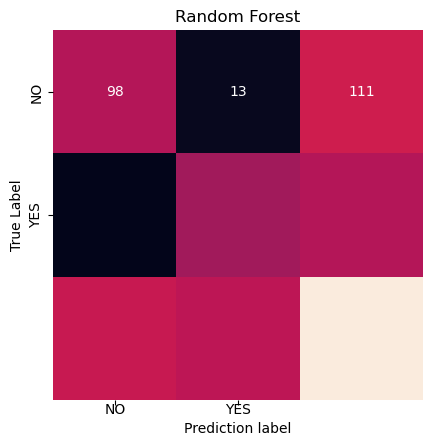

In [39]:
model_evaluation(rf_model.predict(x_test),"Random Forest")

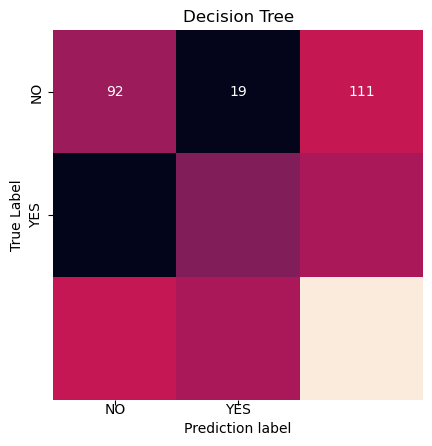

In [40]:
model_evaluation(dt_model.predict(x_test),"Decision Tree")

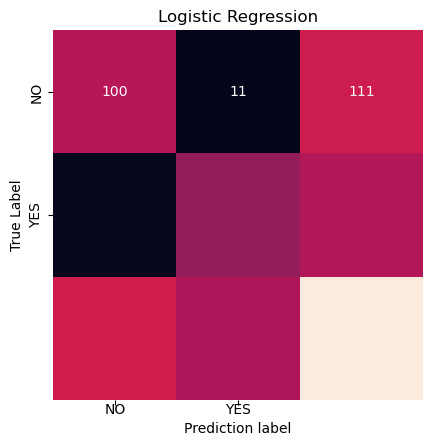

In [41]:
lr_y_pred = lr_model.predict(x_test)
model_evaluation(lr_y_pred,"Logistic Regression")

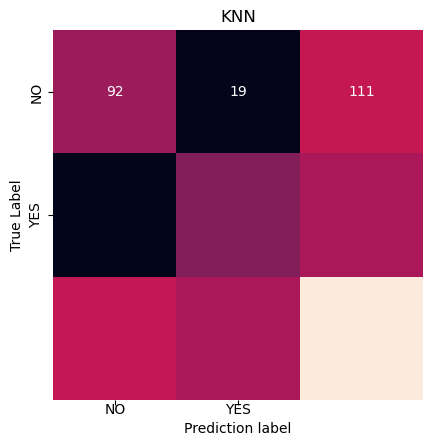

In [42]:
knn_model =  knn.predict(x_test)
model_evaluation(knn_model,"KNN")

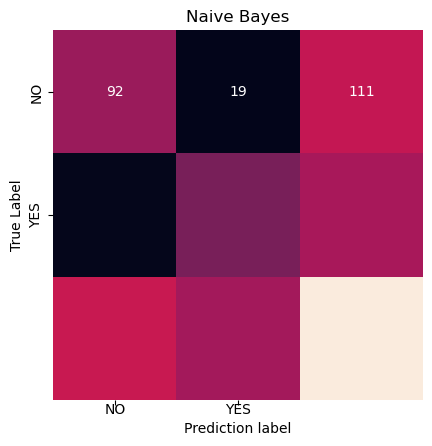

In [43]:
model_evaluation(nb_model.predict(x_test),"Naive Bayes")

D:\APLIKASI\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


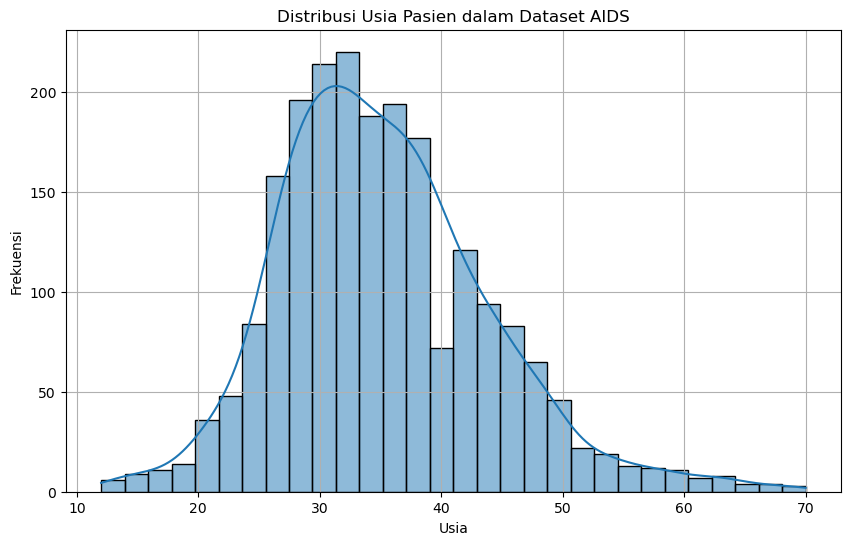

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat dataset
df = pd.read_csv('AIDS.csv')

# Visualisasi distribusi usia
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribusi Usia Pasien dalam Dataset AIDS')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()
